<a href="https://colab.research.google.com/github/PraveenaSL/PRAVEENASL/blob/main/Model_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
##FINDING MISSING VALUES

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
##OUTLIER

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna('S')
data['Cabin']=data['Cabin'].fillna('U')

In [ ]:
num_col=data.select_dtypes(include=np.number).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

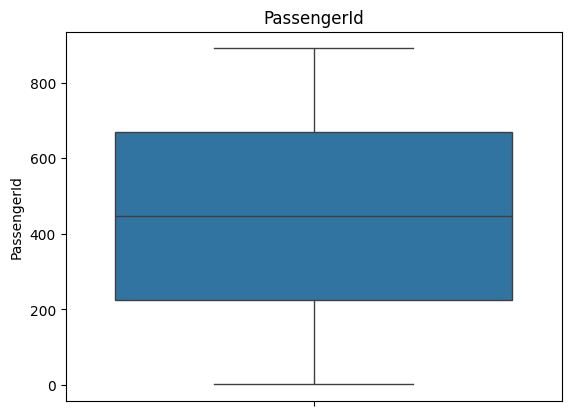

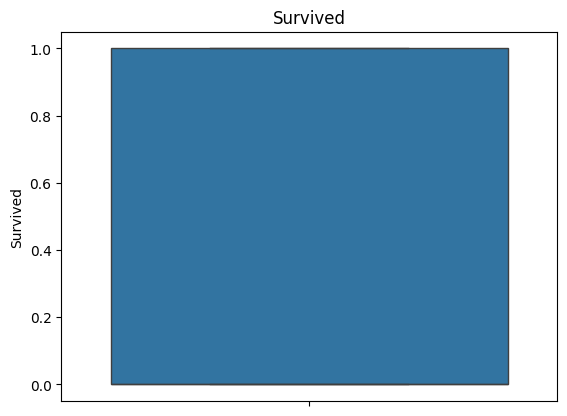

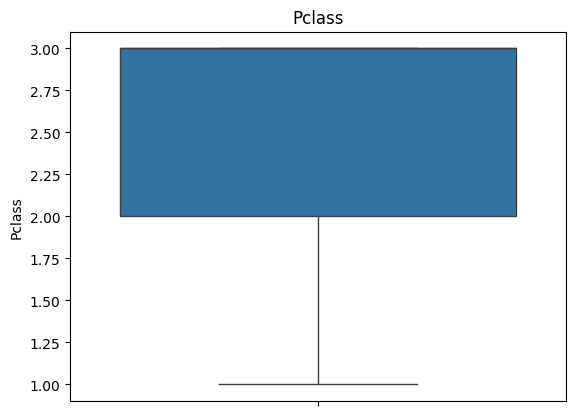

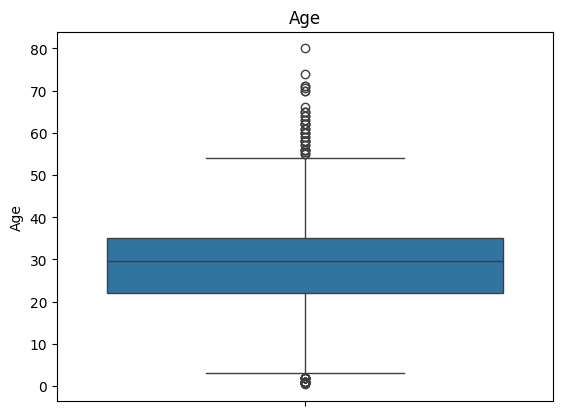

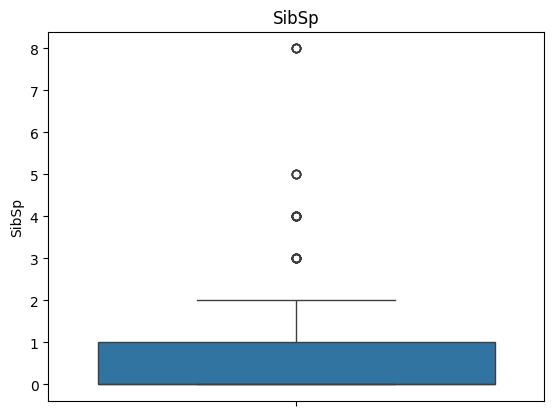

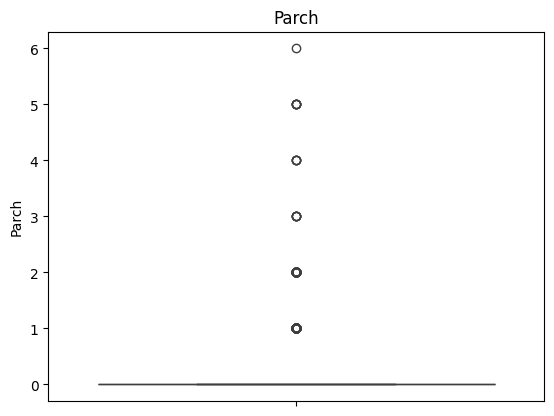

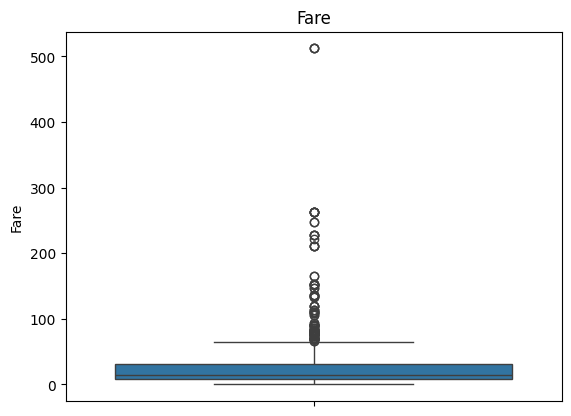

In [ ]:
for i in num_col:
  plt.figure()
  sns.boxplot(data[i])
  plt.title(i)

In [ ]:
q1=data['Fare'].quantile(0.25)
q3=data['Fare'].quantile(0.75)
iqr=q3-q1
iqr
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)
print(iqr)

-26.724
65.6344
23.0896


In [ ]:
q1=data['Age'].quantile(0.25)
q3=data['Age'].quantile(0.75)
iqr=q3-q1
iqr
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)
print(iqr)

2.5
54.5
13.0


In [ ]:
q1=data['SibSp'].quantile(0.25)
q3=data['SibSp'].quantile(0.75)
iqr=q3-q1
iqr
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
print(iqr)

-1.5
2.5
1.0


In [ ]:
q1=data['Parch'].quantile(0.25)
q3=data['Parch'].quantile(0.75)
iqr=q3-q1
iqr
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
print(iqr)


0.0
0.0
0.0


In [ ]:
outlier=[]
for x in data['Age']:
    if x>70 or x<18:
        outlier.append(x)
print(outlier)

[2.0, 14.0, 4.0, 14.0, 2.0, 15.0, 8.0, 14.0, 3.0, 7.0, 5.0, 11.0, 4.0, 17.0, 16.0, 0.83, 17.0, 16.0, 71.0, 14.5, 17.0, 70.5, 2.0, 12.0, 16.0, 9.0, 16.0, 17.0, 1.0, 9.0, 4.0, 1.0, 9.0, 1.0, 4.0, 3.0, 2.0, 16.0, 16.0, 5.0, 8.0, 3.0, 16.0, 7.0, 16.0, 2.0, 0.92, 17.0, 16.0, 16.0, 2.0, 3.0, 15.0, 3.0, 1.0, 1.0, 17.0, 3.0, 10.0, 17.0, 14.0, 4.0, 13.0, 5.0, 0.75, 2.0, 9.0, 9.0, 71.0, 17.0, 16.0, 2.0, 17.0, 7.0, 9.0, 11.0, 8.0, 17.0, 16.0, 4.0, 80.0, 9.0, 2.0, 0.75, 14.0, 14.0, 15.0, 4.0, 6.0, 17.0, 11.0, 16.0, 4.0, 6.0, 0.67, 16.0, 5.0, 13.0, 17.0, 8.0, 1.0, 16.0, 11.0, 0.42, 6.0, 10.0, 2.0, 1.0, 15.0, 0.83, 16.0, 17.0, 4.0, 74.0, 9.0, 16.0, 4.0, 15.0]


In [ ]:
outlier=[]
for x in data['Fare']:
    if x>500 or x<0:
        outlier.append(x)
print(outlier)

[512.3292, 512.3292, 512.3292]


In [ ]:
outlier=[]
for x in data['SibSp']:
    if x>5 or x<0:
        outlier.append(x)
print(outlier)

[8, 8, 8, 8, 8, 8, 8]


In [ ]:
outlier=[]
for x in data['Parch']:
    if x>5 or x<0:
        outlier.append(x)
print(outlier)

[6]


In [ ]:
###ENCODING"

In [ ]:
data1=data.copy()

In [ ]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [ ]:
data1['Sex']=le.fit_transform(data1['Sex'])
data1['Embarked']=le.fit_transform(data1['Embarked'])
data1['Cabin']=le.fit_transform(data1['Cabin'])
data1['Survived']=le.fit_transform(data1['Survived'])
data1['Name']=le.fit_transform(data1['Name'])
data1['Ticket']=le.fit_transform(data1['Ticket'])
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [ ]:
data2=data1.copy()

In [ ]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data2[['Age','Fare','SibSp','Parch']]=sc.fit_transform(data2[['Age','Fare','SibSp','Parch']])
data2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,-0.592481,0.432793,-0.473674,523,-0.502445,147,2
1,2,1,1,190,0,0.638789,0.432793,-0.473674,596,0.786845,81,0
2,3,1,3,353,0,-0.284663,-0.474545,-0.473674,669,-0.488854,147,2
3,4,1,1,272,0,0.407926,0.432793,-0.473674,49,0.420730,55,2
4,5,0,3,15,1,0.407926,-0.474545,-0.473674,472,-0.486337,147,2


In [ ]:
##KNN

In [ ]:
y=data2['Survived']
x=data2.drop('Survived',axis=1)

In [ ]:
x.shape

(891, 11)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
n_neighbor=np.arange(1,15)

In [ ]:
x_train.shape

(712, 11)

In [ ]:
x_test.shape

(179, 11)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from os import access
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
y_pred=knn.fit(x_train,y_train)
acc=knn.score(x_test,y_test)
print(acc)
knn.fit(x_train,y_train)
metrics_knn=knn.score(x_test,y_test)
print(metrics_knn)



0.6536312849162011
0.6536312849162011


In [ ]:
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(k,acc)


NameError: name 'neighbors' is not defined

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=13)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[89 16]
 [43 31]]
0.6703910614525139
0.6595744680851063
0.4189189189189189
0.5123966942148761


In [ ]:
confusion_matrix(y_test,y_pred)

array([[89, 16],
       [43, 31]])

In [ ]:
##SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7932960893854749

In [ ]:
#K FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)

In [ ]:
for train_index,test_index in kf.split(x):
  print('train_index:',test_index)
  print('test_index:',test_index)

train_index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
test_index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178]
test_index: [ 90  91  92  93  94  95  96  97  98  

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=10)
score

array([0.8       , 0.80898876, 0.78651685, 0.85393258, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.84269663, 0.7752809 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

In [ ]:
for train_index,test_index in skf.split(x,y):
  print('train_index:',test_index)
  print('test_index:',test_index)

train_index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 86 87 89 90 91 92 93]
test_index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 86 87 89 90 91 92 93]
train_index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 172 183 184 186 187 190 192 193 194 195 198]
test_index: [ 82  84  85  88  94  95  96  97  98  

In [ ]:
shcv_result=cross_val_score(svc,x,y,cv=skf)
shcv_result

array([0.8       , 0.80898876, 0.78651685, 0.85393258, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.84269663, 0.7752809 ])

In [ ]:
print(shcv_result.mean())


0.7946067415730338
